# Страховка автомобиля

* ID : ID водителя
* AGE : Возраст водителя
* GENDER : Пол водителя
* RACE : Раса клиента
* DRIVING_EXPERIENCE : Стаж вождения
* EDUCATION : Уровень образования.
* INCOME : Уровень дохода
* CREDIT_SCORE : Кредитный рейтинг
* VEHICLE_OWNERSHIP : Владение (физическое) транспортным средством
* VEHICLE_YEAR : Год выпуска транспортного средства
* MARRIED : Нахождение в браке
* CHILDREN : Наличие детей
* POSTAL_CODE : Почтовый индекс
* ANNUAL_MILEAGE : Годовой пробег
* VEHICLE_TYPE : Тип транспортного средства
* SPEEDING_VIOLATIONS : Количество превышений скорости
* DUIS : Количество нарушений, связанных с вождением в нетрезвом виде
* PAST_ACCIDENTS : Количество предыдущих инцидентов
* OUTCOME : исход (0 - не требуется страховая выплата, 1 - требуется)

Требуется предсказать **потребуется ли страховая выплата**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
path = r"Car_Insurance_Claim.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Приведём Object к категориальным типам 

In [5]:
data['AGE'] = data['AGE'].astype('category')
data['GENDER'] = data['GENDER'].astype('category')
data['RACE'] = data['RACE'].astype('category')
data['DRIVING_EXPERIENCE'] = data['DRIVING_EXPERIENCE'].astype('category')
data['EDUCATION'] = pd.Categorical(data['EDUCATION'])
data['INCOME'] = data['INCOME'].astype('category')
data['VEHICLE_YEAR'] = data['VEHICLE_YEAR'].astype('category')
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].astype('category')
data['OUTCOME'] = data['OUTCOME'].astype('bool')

del data['ID']
del data['POSTAL_CODE']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   AGE                  10000 non-null  category
 1   GENDER               10000 non-null  category
 2   RACE                 10000 non-null  category
 3   DRIVING_EXPERIENCE   10000 non-null  category
 4   EDUCATION            10000 non-null  category
 5   INCOME               10000 non-null  category
 6   CREDIT_SCORE         9018 non-null   float64 
 7   VEHICLE_OWNERSHIP    10000 non-null  float64 
 8   VEHICLE_YEAR         10000 non-null  category
 9   MARRIED              10000 non-null  float64 
 10  CHILDREN             10000 non-null  float64 
 11  ANNUAL_MILEAGE       9043 non-null   float64 
 12  VEHICLE_TYPE         10000 non-null  category
 13  SPEEDING_VIOLATIONS  10000 non-null  int64   
 14  DUIS                 10000 non-null  int64   
 15  PAST_ACCIDENTS      

Посмотрим на какие категории они разбились.

In [7]:
(data['AGE'].dtype,
data['GENDER'].dtype,
data['RACE'].dtype,
data['DRIVING_EXPERIENCE'].dtype,
data['EDUCATION'].dtype,
data['INCOME'].dtype,
data['VEHICLE_YEAR'].dtype,
data['VEHICLE_TYPE'].dtype,
data['OUTCOME'].dtype
)

(CategoricalDtype(categories=['16-25', '26-39', '40-64', '65+'], ordered=False),
 CategoricalDtype(categories=['female', 'male'], ordered=False),
 CategoricalDtype(categories=['majority', 'minority'], ordered=False),
 CategoricalDtype(categories=['0-9y', '10-19y', '20-29y', '30y+'], ordered=False),
 CategoricalDtype(categories=['high school', 'none', 'university'], ordered=False),
 CategoricalDtype(categories=['middle class', 'poverty', 'upper class', 'working class'], ordered=False),
 CategoricalDtype(categories=['after 2015', 'before 2015'], ordered=False),
 CategoricalDtype(categories=['sedan', 'sports car'], ordered=False),
 dtype('bool'))

## Визуализация и анализ данных

In [8]:
data.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,9018.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300
std,0.137688,0.459578,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000


Большая половины водителей не попадали в аварии, не превышали скорость и не были замечены в вождении в нетрезвом виде. Наибольшее число превышений скорости = 22, вождений в нетрезвом виде = 6, инциндентов = 15. Так же большая часть владеет автомобилем, а не берет его в аренду.

In [9]:
data.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Основную массу составляют люди с возрастом в диапозоне 26-39 лет, с водительским стажем до 9 лет, с высоким достатком, но закончивших только старшую школу. Большая часть автомобилей является седанами до 2015 года.

Построим диаграммы рассеивания

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


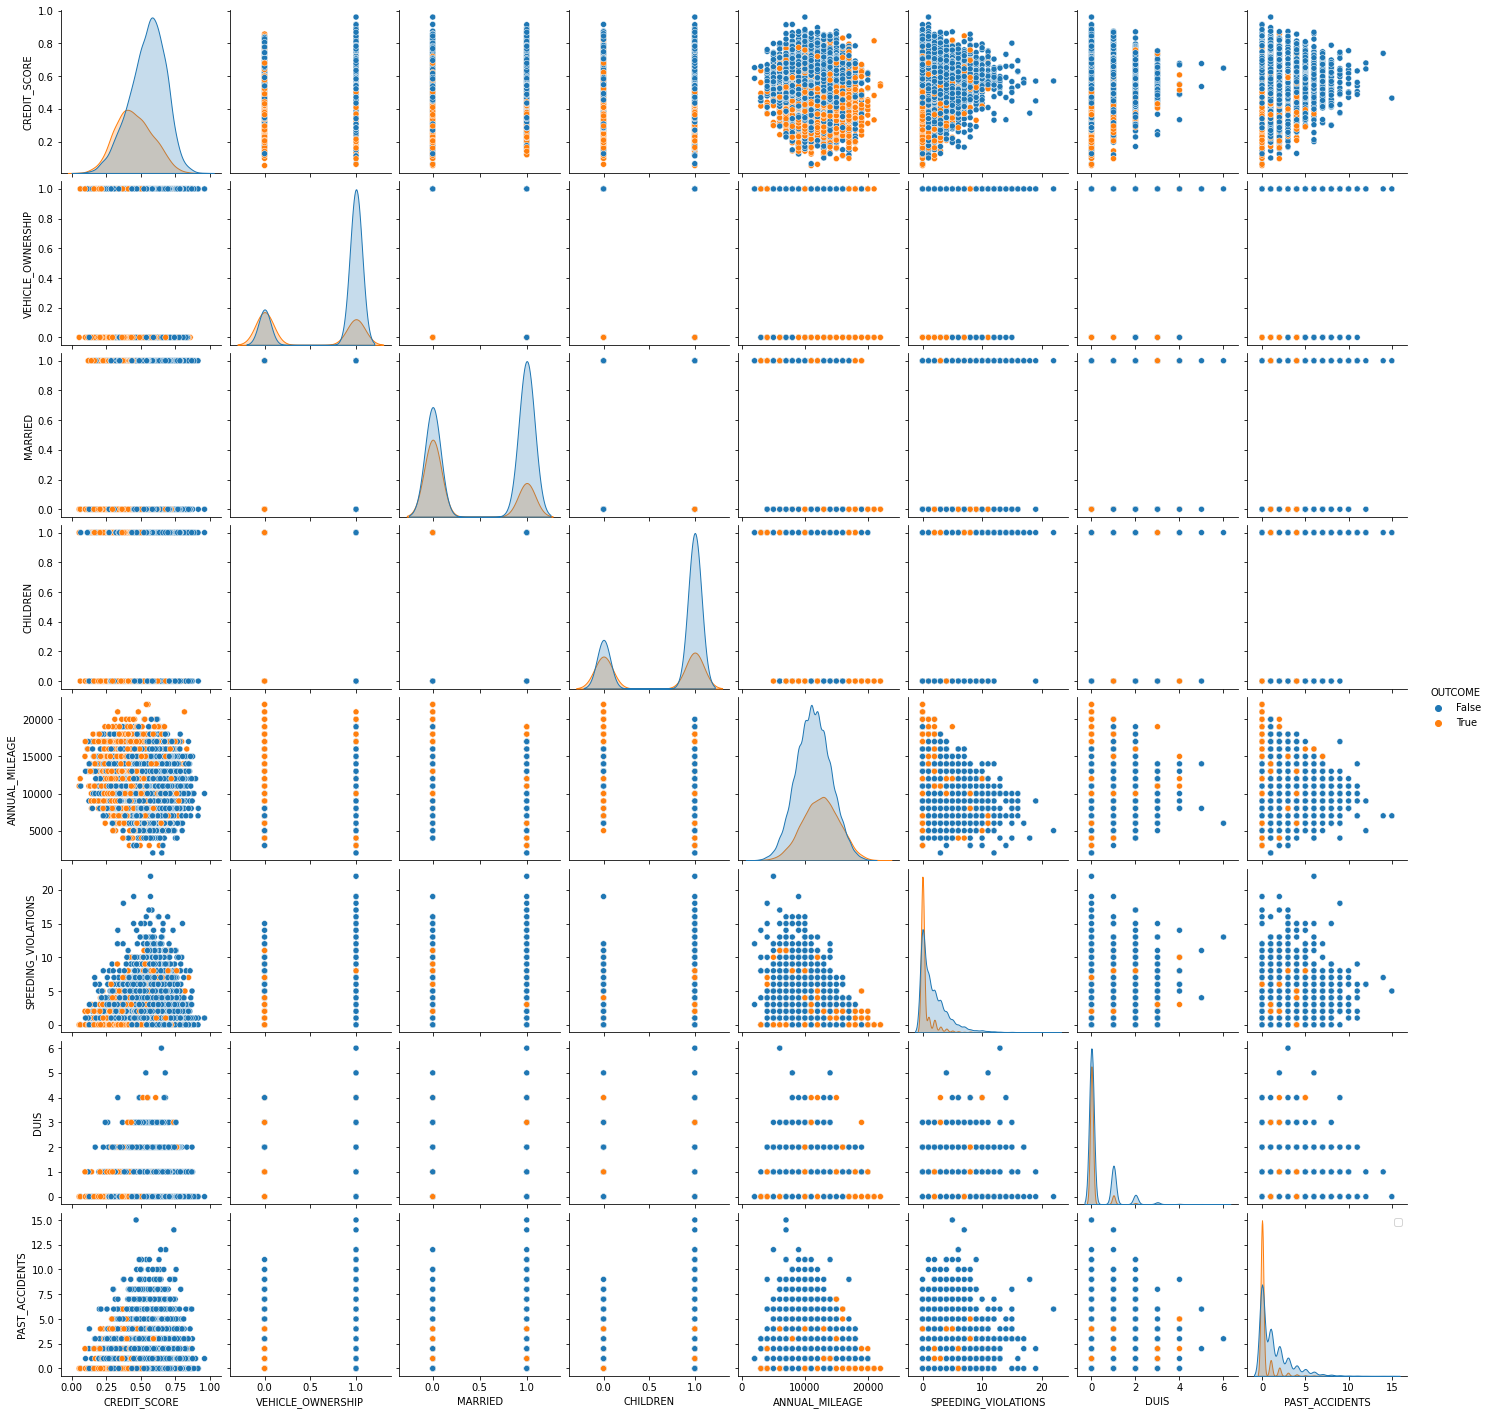

In [10]:
sns.pairplot(data, hue='OUTCOME')
plt.legend()
pass

Не видно очевидной корреляции между параметрами. Построим таблицу корреляции

In [11]:
data.corr()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.312037,0.281238,0.220658,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.312037,1.000000,0.175626,0.125990,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.281238,0.175626,1.000000,0.287009,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.220658,0.125990,0.287009,1.000000,-0.447655,0.220415,0.115354,0.206295,-0.232835
ANNUAL_MILEAGE,-0.174453,-0.097433,-0.462193,-0.447655,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.204542,0.133868,0.218855,0.220415,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.127366,0.086567,0.120840,0.115354,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.180978,0.119521,0.215269,0.206295,-0.195217,0.443074,0.259359,1.000000,-0.311495
OUTCOME,-0.325286,-0.378921,-0.262104,-0.232835,0.187154,-0.291862,-0.189352,-0.311495,1.000000


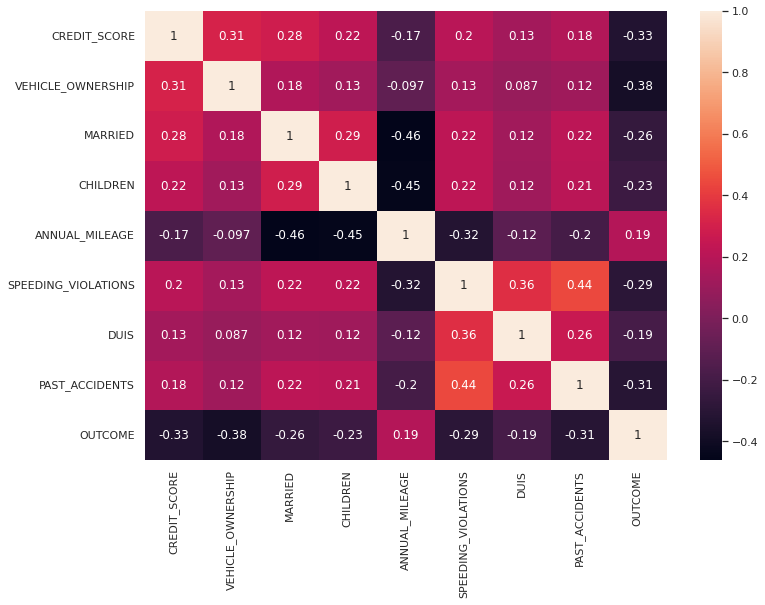

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(data.corr(), annot=True)

Здесь можно увидеть достаточно заметную взаимную корреляцию между превышением скорости, вождением в нетрезвом виде и числом аварий. Что довольно логично. В общем корреляция по признакам не превышает 0,5.

## Обработка пропущенных значений
Просто заполним их медианой и будем надеяться, что всё будет хорошо.

In [13]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

/tmp/ipykernel_5632/3744457309.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(axis = 0), axis=0 , inplace=True)


AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

## Обработка категориальных признаков
Закодируем категориальные признаки числовыми.

In [14]:
cat_cols = ['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE']

data_dummies = pd.concat([pd.get_dummies(data[col], prefix=col, drop_first=True) for col in cat_cols], axis=1)
data_fin = pd.concat([data_dummies, data], axis=1)

for col in cat_cols:
    del data_fin[col]

data_fin.head(5)

,AGE_26-39,AGE_40-64,AGE_65+,GENDER_male,RACE_minority,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,...,VEHICLE_TYPE_sports car,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,0,1,0,0,0,0,0,0,0,...,0,0.629027,1.0,0.0,1.0,12000.0,0,0,0,False
1,0,0,0,1,0,0,0,0,1,0,...,0,0.357757,0.0,0.0,0.0,16000.0,0,0,0,True
2,0,0,0,0,0,0,0,0,0,0,...,0,0.493146,1.0,0.0,0.0,11000.0,0,0,0,False
3,0,0,0,1,0,0,0,0,0,1,...,0,0.206013,1.0,0.0,1.0,11000.0,0,0,0,False
4,1,0,0,1,0,1,0,0,1,0,...,0,0.388366,1.0,0.0,0.0,12000.0,2,0,1,True


## Разбиение выборки

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 451)
for train_index, test_index in split.split(data_fin, data_fin['OUTCOME']):
    strat_train_set = data_fin.loc[train_index]
    strat_test_set = data_fin.loc[test_index]

In [16]:
x_train = strat_train_set.drop('OUTCOME', axis = 1)
y_train = strat_train_set['OUTCOME'].copy()

x_test = strat_test_set.drop('OUTCOME', axis = 1)
y_test = strat_test_set['OUTCOME'].copy()

## Нормализация признаков

In [17]:
from sklearn.preprocessing import MinMaxScaler

x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

## KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [19]:
print("Train: ", 1-knn.score(x_train, y_train))
print("Test: ", 1-knn.score(x_test, y_test))

Train:  0.14906666666666668
Test:  0.19320000000000004


In [20]:
from sklearn.metrics import confusion_matrix

y_test_predict = knn.predict(x_test)
print(confusion_matrix(y_test, y_test_predict))

[[1531  186]
 [ 297  486]]


Попробуем с другим числом соседей

In [21]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
print("Train: ", 1-knn.score(x_train, y_train))
print("Test: ", 1-knn.score(x_test, y_test))

Train:  0.13373333333333337
Test:  0.19840000000000002


In [23]:
from sklearn.metrics import confusion_matrix

y_test_predict = knn.predict(x_test)
print(confusion_matrix(y_test, y_test_predict))

[[1488  229]
 [ 267  516]]


Как видим, стало только хуже... При меньшем числе соседей ошибка не уменьшилась.
Основная ошибка false negative.

## Random forest

In [24]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 200)
rf.fit(x_train, y_train)

err_train = np.mean(y_train != rf.predict(x_train))
err_test  = np.mean(y_test  != rf.predict(x_test))

print(err_train, err_test)

y_test_predict = rf.predict(x_test)
print(confusion_matrix(y_test, y_test_predict))

0.0005333333333333334 0.18
[[1530  187]
 [ 263  520]]


Ни увеличение, ни уменьшение количества деревьев не приводят к заметному уменьшению ошибки на тестовой выборке...

## Выводы

В наступлении страхового случая велика доля вероятности, поэтому ошибки в предсказании не избежать. Возможно не хвататает каких-то других признаков.